In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.data.shape)
print(bc.target.shape, np.unique(bc.target))
print(bc.feature_names)
X = bc.data
y = bc.target

(569, 30)
(569,) [0 1]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1138)

In [5]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

0.965034965034965
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.96      0.99      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9300699300699301


In [8]:
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
print(bc_df[['mean radius', 'texture error', 'worst concavity']].describe())

       mean radius  texture error  worst concavity
count   569.000000     569.000000       569.000000
mean     14.127292       1.216853         0.272188
std       3.524049       0.551648         0.208624
min       6.981000       0.360200         0.000000
25%      11.700000       0.833900         0.114500
50%      13.370000       1.108000         0.226700
75%      15.780000       1.474000         0.382900
max      28.110000       4.885000         1.252000


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [10]:
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.972027972027972


## Cross Validation using KFold

Let's first of all get the validation scores without standardscaler

In [11]:
from sklearn.model_selection import KFold

## IMPORTANT

With KFold always be careful with whether you want it to shuffle the folds or not. I said in lectures the folds need to be shuffled

Since we have already used train_test_split which did some shuffling for us, in this case, we don't need to shuffle again. But THIS IS NOT ALWAYS TRUE. Be aware about what earlier steps you have taken

In [12]:
n_folds=5
ks=range(21) # go from 0 to 20 (but we'll skip 0 in the end!) you can increase this if you want
train_scores = np.zeros((len(ks),n_folds)) # creating an empty array to store the score for each fold and each degree
valid_scores = np.zeros((len(ks),n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)
for k in ks:
    if k == 0:
        continue ##we can't have 0 neighbors so let's skip this one
    print(k) # Just outputting something to screen to make sure things are running

    fold = 0
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        est = KNeighborsClassifier(n_neighbors = k)
        est.fit(X_c, y_c) # fit on the remaining train
        train_scores[k, fold] = est.score(X_c, y_c)
        valid_scores[k, fold] = est.score(X_val, y_val)
        fold += 1 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [13]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [14]:
bestk = np.argmax(mean_valid_scores)
bestk

np.int64(6)

In [15]:
mean_valid_scores[bestk]

np.float64(0.9436935704514365)

## Cross Validation with StandardScaler

Now let's do validation using standardscaler and finding bestk

In [16]:
n_folds=5
ks=range(21)
train_scores = np.zeros((len(ks),n_folds))
valid_scores = np.zeros((len(ks),n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)
for k in ks:
    fold = 0
    if k == 0:
        continue ##we can't have 0 neighbors so let's skip this one
    print(k)
        
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        est = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors = k)
        )
        est.fit(X_c, y_c) # fit on the remaining train
        train_scores[k, fold] = est.score(X_c, y_c)
        valid_scores[k, fold] = est.score(X_val, y_val)
        fold += 1 
  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [17]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [18]:
bestk = np.argmax(mean_valid_scores)
bestk

np.int64(3)

In [19]:
mean_valid_scores[bestk]

np.float64(0.9694938440492477)

### Validation score with standard scaler and k=3 is the best one so we'll go with that

Let's plot it now just to see

In [20]:
import matplotlib.pyplot as plt

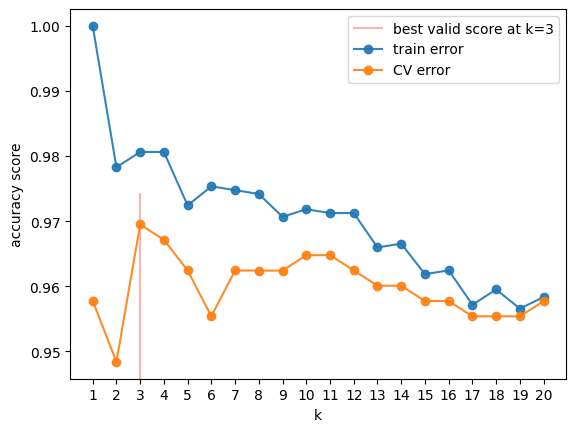

In [21]:
plt.axvline(bestk, 0,0.5, color='r', label="best valid score at k=%d"%bestk, alpha=0.3)
plt.plot(ks[1:], mean_train_scores[1:], marker='o', label='train error', alpha=0.9)
plt.plot(ks[1:], mean_valid_scores[1:], marker='o', label='CV error', alpha=0.9)
plt.legend(loc='upper right')
plt.xticks(range(1,21))
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

#### Final Evaluation

In [22]:
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3)
)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.986013986013986


In [23]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.98      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



## Now what about Linear SVM

In [24]:
from sklearn.svm import SVC

In [25]:
model = SVC(kernel='linear', C=2.0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.958041958041958

Not as good as expected

But SVM has the same scaling issues as kNN so let's try a StandardScaler

In [26]:
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=2.0)
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2.0, kernel='linear'))])

In [27]:
model.score(X_test, y_test)

0.993006993006993

Even better than the previous. Again though I should be using cross-validation to make choices of course so let's try different Cs

In [28]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 1000, 10000]

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
n_folds=5
count = 0
train_scores = np.zeros((len(Cs),n_folds))
valid_scores = np.zeros((len(Cs),n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)
for i in Cs:
    fold = 0
    print(i)
        
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        est = make_pipeline(
            StandardScaler(),
            SVC(kernel='linear', C=i)
        )
        est.fit(X_c, y_c) # fit on the remaining train
        train_scores[count, fold] = est.score(X_c, y_c)
        valid_scores[count, fold] = est.score(X_val, y_val)
        fold += 1 
    count += 1

0.0001
0.001
0.01
0.1
1
2
5
10
100
1000
10000


In [31]:
train_scores.mean(axis=1)

array([0.62910643, 0.93603761, 0.96126445, 0.9800483 , 0.98239434,
       0.98650336, 0.98826289, 0.99002415, 0.99706745, 1.        ,
       1.        ])

This shows us that as C increases it goes from underfit to overfit

Let's look at validation data now

In [32]:
valid_scores.mean(axis=1)

array([0.62675787, 0.93195622, 0.95540356, 0.97652531, 0.9671409 ,
       0.9671409 , 0.96954856, 0.96484268, 0.95310534, 0.95310534,
       0.95310534])

What's the biggest of those?

In [33]:
best = np.argmax(valid_scores.mean(axis=1))

In [34]:
valid_scores[best].mean()

np.float64(0.9765253077975377)

In [35]:
Cs[3]

0.1

So C=0.1 is what we should choose, let's train with the full set

In [36]:
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=0.1)
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [37]:
model.score(X_test, y_test)

0.986013986013986

# Conclusion - How to Interpret numbers and make decisions

Let's look at the best scores 

- kNN with standard scaler and k=3 gives
  - Test Score of 0.986013986013986
  - Validation Score of 0.9694938440492477
- SVM with standard scaler and C=0.1 gives
  - Test Score of 0.986013986013986
  - Validation Score of 0.9765253077975377

We also had a test score of 0.993006993006993 for SVM with C=2. Why am I not considering that?

- We can't use test scores to make decisions, if we did then they weren't really test scores
- Pick whichever has the highest validation score to make your decision
  - This is SVM with StandardScaler and C=0.1
- kNN and SVM are very close, you could look at the classification report to maybe make an overall decision
- We could even use multiple models (in an Ensemble) and take a vote

### Alternative k-fold cross validation

This is another way of doing the cross validation loop using cross_val_score, this uses kFold in the background

In [38]:
valid_scores = np.zeros(len(Cs))
count = 0
for i in Cs:
    est = make_pipeline(
            StandardScaler(),
            SVC(kernel='linear', C=i)
    )
    valid_scores[count] = cross_val_score(est, X_train, y_train).mean()
    count += 1

## GridSearchCV is another way

First let's do it without the Scaler

In [39]:
Cs

[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 1000, 10000]

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
svclass = SVC(kernel='linear')

In [42]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [43]:
model_grid = GridSearchCV(svclass, Cs)
model_grid.fit(X_train,y_train)

TypeError: Parameter grid is not a dict (0.0001)

Nothing happened, I didn't use param_grid properly. It needs to be a dictionary matching the variable name for the model in GridSearchCV

In [ ]:
param_grid = { "C" : Cs}
param_grid

In [ ]:
model_grid = GridSearchCV(svclass, param_grid=param_grid, verbose=2)

In [ ]:
model_grid.fit(X_train, y_train)

Notice how as C increases, the processing time takes longer. You could set n_jobs=-1 to get it to run faster but it won't give me the output to demo then

In [ ]:
model_grid.best_params_

In [ ]:
model_grid.best_score_

We could then retrain the model using the best_params we have, or we could RTM and see if refit=True then GridSearchCV does this for us

In [ ]:
finalmodel = model_grid.best_estimator_

Ok now what if we have a standard scaler, our param_grid needs changes made due to the pipeline

In [ ]:
svclass = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear', C=2.0)
)

If we left it as param_grid = {"C" : Cs} then gridsearch does not know if that C applies to the StandardScaler step or the svc step,

we can change our dictionary like this to ensure it knows

In [ ]:
param_grid = {"svc__C" : Cs}

In [ ]:
model_grid = GridSearchCV(svclass, param_grid=param_grid, verbose=2)
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ......................................svc__C=0.0001; total time=   0.0s
[CV] END ......................................svc__C=0.0001; total time=   0.0s
[CV] END ......................................svc__C=0.0001; total time=   0.0s
[CV] END ......................................svc__C=0.0001; total time=   0.0s
[CV] END ......................................svc__C=0.0001; total time=   0.0s
[CV] END .......................................svc__C=0.001; total time=   0.0s
[CV] END .......................................svc__C=0.001; total time=   0.0s
[CV] END .......................................svc__C=0.001; total time=   0.0s
[CV] END .......................................svc__C=0.001; total time=   0.0s
[CV] END .......................................svc__C=0.001; total time=   0.0s
[CV] END ........................................svc__C=0.01; total time=   0.0s
[CV] END .......................................

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100,
                                    1000, 10000]},
             verbose=2)

Wow it's a lot faster with StandardScaler being applied

In [ ]:
model_grid.best_params_

{'svc__C': 0.1}

Same as what we got by the other methods, this isn't always going to be the case as gridsearchcv is very slightly different

In [ ]:
model_grid.best_score_

0.9788782489740082

See the best_score is different to what I got by the other methods

In [ ]:
finalmodel = model_grid.best_estimator_

## Different Kernels

In [ ]:
kernels = ["linear","rbf","poly"]

In [ ]:
Cs

[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 1000, 10000]

In [ ]:
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale']

In [ ]:
degrees = [2,3,4,5,6,7,8,9]

In [ ]:
SVC?

In [ ]:
svclass = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear')
)

In [ ]:
param_grid = {"svc__C":Cs, "svc__kernel":kernels, "svc__gamma":gammas, "svc__degree":degrees}

Some of this fitting will be redundant as degree does nothing for a non-poly kernel, gamma does nothing for a non-rbf kernel. This would have 1848 candidates and 9240 fits (and it crashed on me too!)

So let's be smarter and do it this way instead

In [ ]:
param_grid = [
  {'svc__C': Cs, 'svc__kernel': ['linear']},
  {'svc__C': Cs, 'svc__gamma': gammas, 'svc__kernel': ['rbf']},
    {'svc__C': Cs, 'svc__degree': degrees, 'svc__kernel': ['poly']}
 ]

In [ ]:
model_grid = GridSearchCV(svclass, param_grid=param_grid, verbose=2)

In [ ]:
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 187 candidates, totalling 935 fits
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.0s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.0s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.0s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.0s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.0s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   0.0s
[CV] END ....................svc__C=0.01, svc_

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100,
                                     1000, 10000],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100,
                                     1000, 10000],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                         'scale'],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100,
                                     1000, 10000],
                          'svc__degree': [2, 3, 4, 5, 6, 7, 8, 9],
                          'svc__kernel': ['poly']}],
             verbose=2)

187 candidates and 935 fits. A lot of them, but better than 1848 candidates and 9240

In [ ]:
model_grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [ ]:
model_grid.best_score_

0.9812038303693571

The best validation score we have so far

In [ ]:
finalmodel = model_grid.best_estimator_

In [ ]:
finalmodel.score(X_test,y_test)

0.993006993006993

And the best test score so far!

## Colour Data Lab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import lab2rgb
from skimage.color import rgb2lab
import sys


# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 114, 0),
    'yellow': (255, 255, 0),
    'green': (0, 230, 0),
    'blue': (0, 0, 255),
    'purple': (187, 0, 187),
    'brown': (117, 60, 0),
    'pink': (255, 187, 187),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])


def plot_predictions(model, lum=71, resolution=256):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, 3)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)

In [ ]:
data = pd.read_csv("colour-data.csv")

In [ ]:
X = (data[["R","G","B"]]/255).values
y = data.Label.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1138)

In [ ]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10]

In [ ]:
gammas = [0.001, 0.01, 0.1, 1, 10, 'scale']

In [ ]:
param_grid = [
  {'C': Cs, 'kernel': ['linear']},
  {'C': Cs, 'gamma': gammas, 'kernel': ['rbf']},
 ]

In [ ]:
svclass = SVC()
model_grid = GridSearchCV(svclass, param_grid=param_grid, verbose=2)

In [ ]:
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ............................C=0.0001, kernel=linear; total time=   0.2s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.2s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.1s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.2s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.2s
[CV] END ..............................C=0.01, 

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale'],
                          'kernel': ['rbf']}],
             verbose=2)

In [ ]:
model_grid.best_params_

{'C': 5, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
model_grid.best_score_

0.7493670886075949

In [ ]:
model_grid.best_estimator_.score(X_test,y_test)

0.7632911392405063

That's a better test score than the previous ones

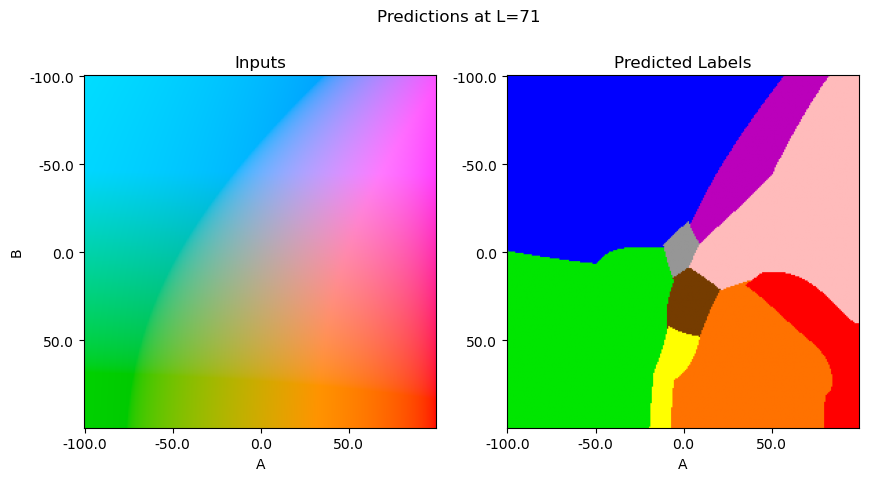

In [ ]:
plot_predictions(model_grid.best_estimator_)

With LAB?

In [ ]:
param_grid = [
  {'svc__C': Cs, 'svc__kernel': ['linear']},
  {'svc__C': Cs, 'svc__gamma': gammas, 'svc__kernel': ['rbf']},
 ]

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def makelab(X):
    X = X.reshape(1,-1,3)
    lab = rgb2lab(X)
    return lab.reshape(-1,3)

In [ ]:
svpipe = make_pipeline(
            FunctionTransformer(makelab),
            SVC()
        )

In [ ]:
model_grid = GridSearchCV(svpipe, param_grid=param_grid, n_jobs=-1, verbose=4)

In [ ]:
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(estimator=Pipeline(steps=[('functiontransformer',
                                        FunctionTransformer(func=<function makelab at 0x000001B89C319800>)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 'scale'],
                          'svc__kernel': ['rbf']}],
             verbose=4)

In [ ]:
model_grid.best_params_

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [ ]:
model_grid.best_score_

0.7512658227848101

In [ ]:
model_grid.best_estimator_.score(X_test,y_test)

0.7582278481012659

A better validation score using lab, but a worse test score. Which should we choose for our final model??

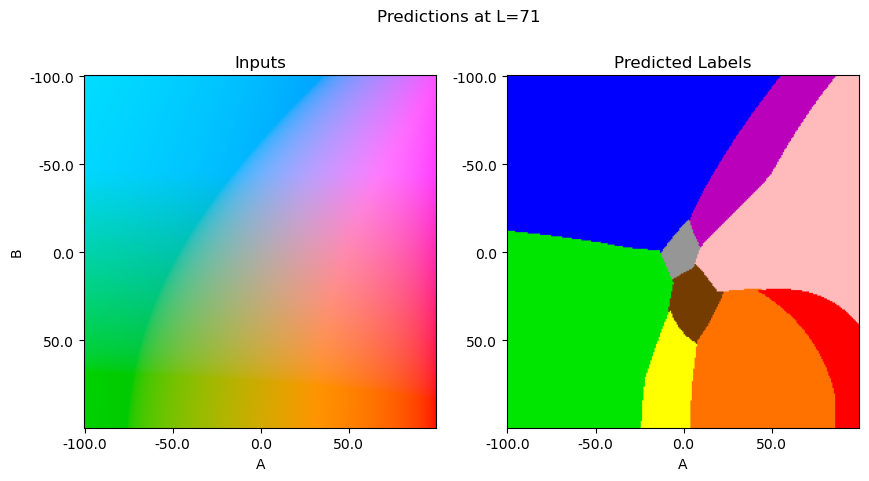

In [ ]:
plot_predictions(model_grid.best_estimator_)